In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [7]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [8]:
X_train=X[:20]

In [9]:
X_test=X[21:]

In [10]:
y_train=y[:20]
y_test=y[21:]

In [11]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [12]:
def simple_linear_regressison(x,y):
    x_mean=np.mean(x)
    y_mean=np.mean(y)
    
    sum_xy=0
    for i in range(len(x)):
        sum_xy+=x[i]*y[i]
    sum_xy/=len(x)
    S_xy=sum_xy-(x_mean*y_mean)
    
    sum_xx=0
    for i in range(len(x)):
        sum_xx+=(x[i]*x[i])
    sum_xx/=len(x)
    S_xx=sum_xx-(x_mean*x_mean)
    
    
    B1=S_xy/S_xx
    
    B0=y_mean - B1*x_mean
    
    return B0,B1
    
    

In [13]:
b0,b1=simple_linear_regressison(X_train,y_train)

In [14]:
b0

array([26577.40001951])

In [15]:
b1

array([9116.11420069])

In [16]:
def predict(x):
    return x*b1 +b0

In [17]:
predict(10.5)

array([122296.59912679])

In [18]:
import matplotlib.pyplot as plt

In [19]:
y=b1*X_train+b0

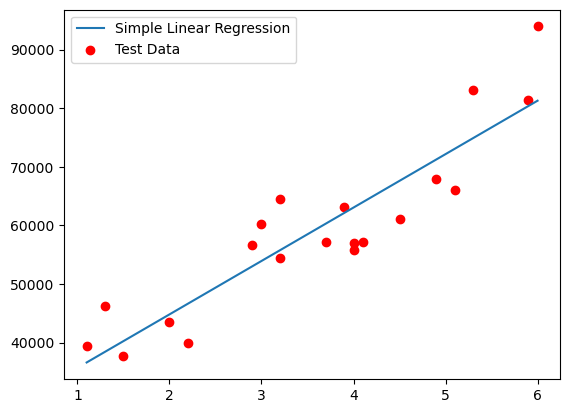

In [20]:
plt.plot(X_train, y, label=f"y = {b1}x + {b0}")
plt.scatter(X_train,y_train,color='red')
plt.legend(['Simple Linear Regression','Test Data'])

In [21]:
y_pred=b0+b1*X_test
y_pred

array([[ 91301.81084443],
       [ 98594.70220499],
       [101329.53646519],
       [105887.59356554],
       [108622.42782575],
       [113180.48492609],
       [114092.09634616],
       [120473.37628665],
       [122296.59912679]])

In [22]:
accuracy=np.mean(abs(y_pred-y_test))

In [23]:
accuracy

10415.381354947154

In [60]:
import numpy as np

def gradient_descent(X, y, initial_lr=0.01, decay_rate=0.01, epochs=1000, tol=1e-6):
    m = len(y)
    theta = np.random.randn(X.shape[1]) 

    for epoch in range(epochs):
        gradient = (2/m) * X.T.dot(X.dot(theta) - y)

        lr = initial_lr / (1 + decay_rate * epoch)

        theta -= lr * gradient

        error = np.mean((X.dot(theta) - y) ** 2)

        if error < tol:
            print(f"Stopped early at epoch {epoch}, error={error:.6f}")
            break

    return theta,gradient


theta , grad= gradient_descent(X_train, y_train)
print(f"Learned parameters (theta): {theta}, intercept {grad}")


Learned parameters (theta): [15503.37260677], intercept [-2.1973392e-10]


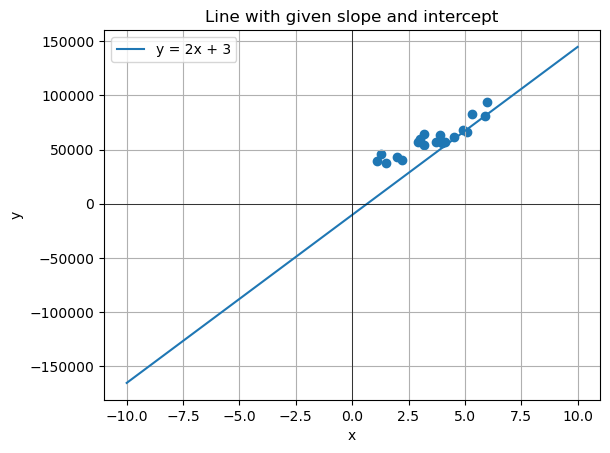

In [63]:
import numpy as np
import matplotlib.pyplot as plt

slope = 2
intercept = 3

x = np.linspace(-10, 10, 100)

y = theta * x + grad

plt.plot(x, y, label=f"y = {slope}x + {intercept}")

plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.scatter(X_train,y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Line with given slope and intercept")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import numpy as np

def stochastic_gradient_descent(X, y, lr=0.001, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n)  

    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

            theta -= lr * gradients.flatten()
    
    return theta,gradients

theta1,grad1 = stochastic_gradient_descent(X_train, y_train)
print(f"Intercept: {theta} , Slope: {grad}")


Intercept: [15404.27673964] , Slope: [120770.3805048]


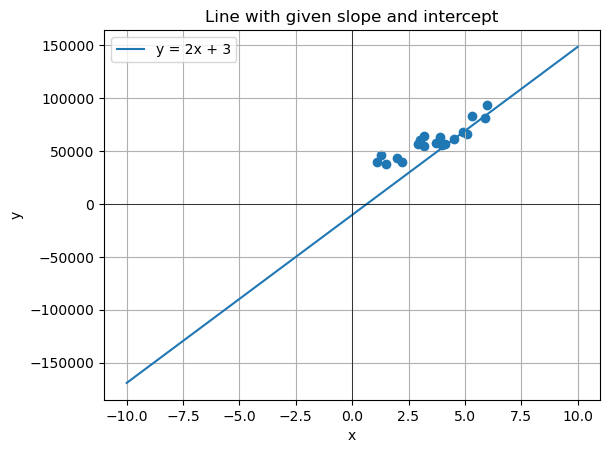

In [52]:
import numpy as np
import matplotlib.pyplot as plt

slope = 2
intercept = 3

x = np.linspace(-10, 10, 100)

y = theta1 * x + grad1

plt.plot(x, y, label=f"y = {slope}x + {intercept}")

plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5) 
plt.scatter(X_train,y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Line with given slope and intercept")
plt.legend()
plt.grid(True)
plt.show()


In [65]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor(max_iter=1000,tol=1e-3)

In [66]:
sgd.fit(X_train,y_train)

SGDRegressor()

In [68]:
pred=sgd.predict(X_test)

In [70]:
sgd.intercept_

array([22466.90689399])

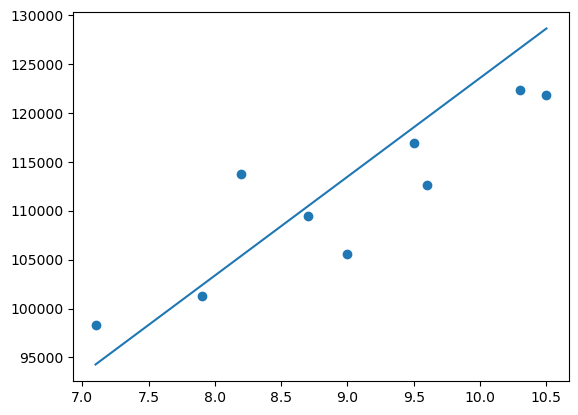

In [77]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)